## 1st use with skimage

In [1]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage import exposure
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import numpy as np

## Display original image

In [2]:
image1 = imread('railway.jpg') #, as_gray=True)
#image1_Gray = rgb2gray(image1)
image1_Gray = imread('railway.jpg', as_gray=True)

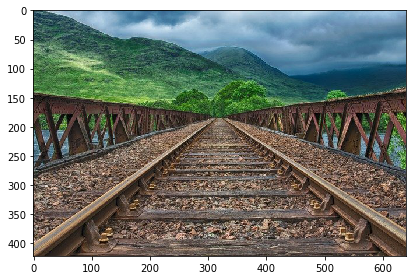

In [3]:
imshow(image1)

### Convert image in Black and white only

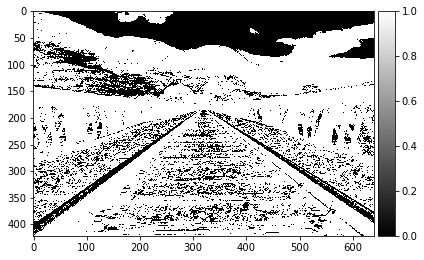

In [8]:
im = np.where(image1_Gray>128/256, 0, 1)
imshow(im, cmap=plt.get_cmap('gray'))

In [9]:
im

array([[1, 0, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 1]])

In [10]:
image1_Gray.shape

(422, 640)

### Grayscale image

In [11]:
image1_Gray

array([[0.47135059, 0.5189749 , 0.46799451, ..., 0.71744157, 0.72136314,
        0.72136314],
       [0.46463843, 0.43466471, 0.39937059, ..., 0.70175529, 0.70567686,
        0.70567686],
       [0.37194941, 0.35234157, 0.29772235, ..., 0.69391216, 0.69783373,
        0.69783373],
       ...,
       [0.49070706, 0.54560902, 0.57951922, ..., 0.22250078, 0.23090941,
        0.20738   ],
       [0.58344078, 0.53638196, 0.49492627, ..., 0.22642235, 0.23875255,
        0.21130157],
       [0.5442251 , 0.51175137, 0.43360275, ..., 0.21465765, 0.24659569,
        0.23090941]])

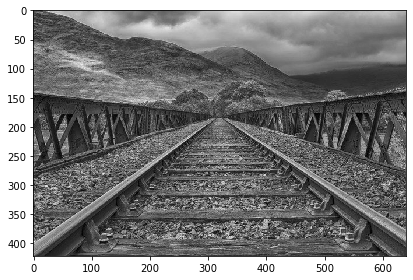

In [12]:
imshow(image1_Gray)

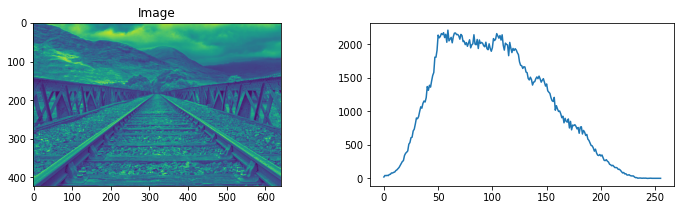

In [16]:
def histGrayScale(img):
    _, axes = plt.subplots(ncols=2, figsize=(12, 3))
    ax = axes.ravel()
    ax[0].imshow(img)
    ax[0].set_title('Image')
    hist = exposure.histogram(img)
    ax[1].plot(hist[0])
histGrayScale(image1_Gray)

For a better rendering you need to use the good colormap (https://predictablynoisy.com/matplotlib/api/_as_gen/matplotlib.pyplot.get_cmap.html)

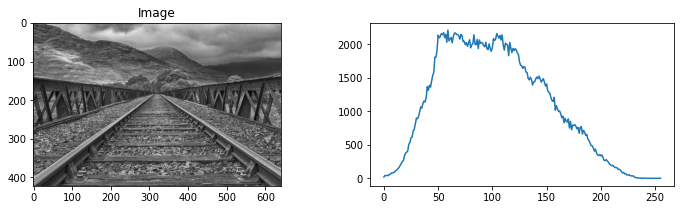

In [17]:
def histGrayScale(img):
    _, axes = plt.subplots(ncols=2, figsize=(12, 3))
    ax = axes.ravel()
    ax[0].imshow(img, cmap=plt.get_cmap('gray'))
    ax[0].set_title('Image')
    hist = exposure.histogram(img)
    ax[1].plot(hist[0])
histGrayScale(image1_Gray)

In [18]:
image1_Gray.ndim

2

### Display histogram for image 1 (colored)

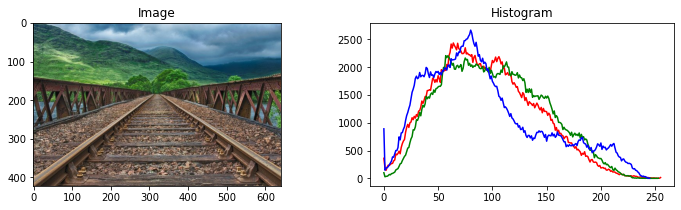

In [19]:
def histColor(img):
    _, axes = plt.subplots(ncols=2, figsize=(12, 3))
    axes[0].imshow(img)
    axes[0].set_title('Image')
    axes[1].set_title('Histogram')
    axes[1].plot(exposure.histogram(img[...,0])[0], color='red')
    axes[1].plot(exposure.histogram(img[...,1])[0], color='green')
    axes[1].plot(exposure.histogram(img[...,2])[0], color='blue')
histColor(image1)

# Function to display image and histogram together

In [20]:
def imageHist(image):
    _, axis = plt.subplots(ncols=2, figsize=(12, 3))
    if (image.ndim == 2):
        # Grascale Image
        axis[0].imshow(image, cmap=plt.get_cmap('gray'))
        axis[1].set_title('Histogram')
        axis[0].set_title('Grayscale Image')
        hist = exposure.histogram(image)
        axis[1].plot(hist[0])
    else:
        # Color image
        axis[0].imshow(image, cmap='gray')
        axis[1].set_title('Histogram')
        axis[0].set_title('Colored Image')
        axis[1].plot(exposure.histogram(image[...,0])[0], color='red')
        axis[1].plot(exposure.histogram(image[...,1])[0], color='green')
        axis[1].plot(exposure.histogram(image[...,2])[0], color='blue')

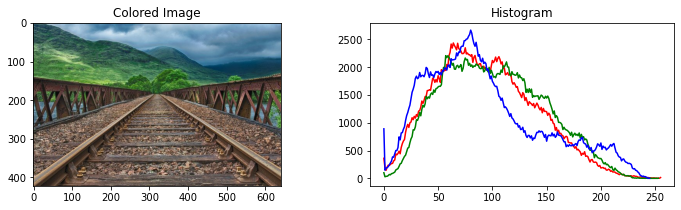

In [21]:
imageHist(image1)

### Thresold at 250 ... (we set the pixel to 1 if they > 250

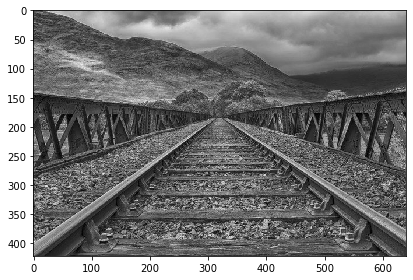

In [22]:
im = np.where(image1_Gray>250/256, 1, image1_Gray)
imshow(im)

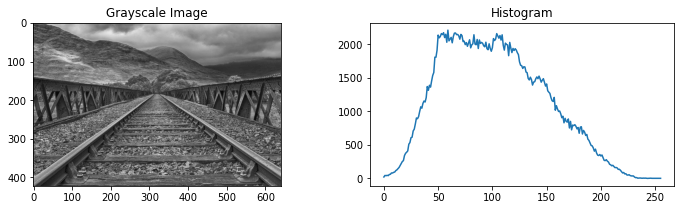

In [23]:
imageHist(im)

### Thresold at 120 ... (we set the pixel to 1 if they > 250

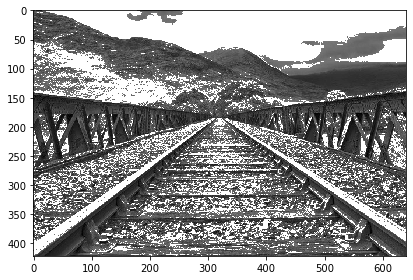

In [24]:
im = np.where(image1_Gray>=120/256, 1, image1_Gray)
imshow(im)

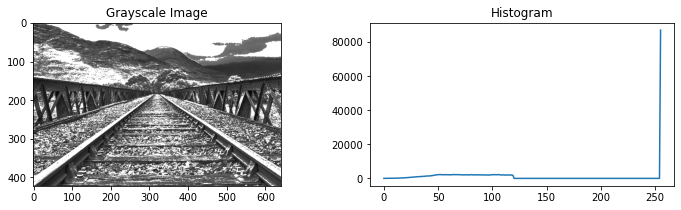

In [25]:
imageHist(im)

## Threshold based on mean

In [26]:
from skimage.filters import threshold_mean

In [27]:
thresh = threshold_mean(image1) 
# return Upper threshold value. All pixels with an intensity higher than this value are assumed to be foreground.
print(thresh)

96.28343453791469


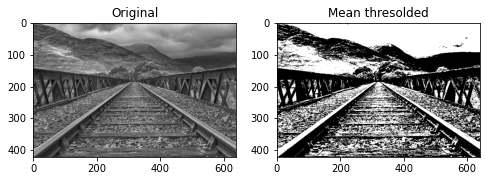

In [28]:
def thresholdMeanDisplay(image):
    thresh = threshold_mean(image)
    binary = image > thresh
    fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
    ax = axes.ravel()
    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Original')
    ax[1].imshow(binary, cmap=plt.cm.gray)
    ax[1].set_title('Mean thresolded')
    
thresholdMeanDisplay(image1_Gray)

## Otsu Threshold

from skimage.filters import threshold_otsu, threshold_localCompute a threshold mask image based on local pixel neighborhood.

In [29]:
from skimage.filters import threshold_otsu

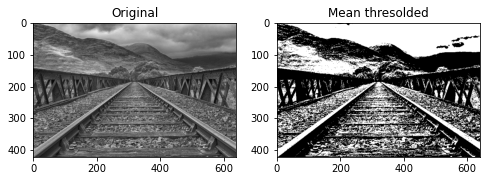

In [30]:
def thresholdOtsuDisplay(image):
    thresh = threshold_otsu(image)
    binary = image > thresh
    fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
    ax = axes.ravel()
    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Original')
    ax[1].imshow(binary, cmap=plt.cm.gray)
    ax[1].set_title('Mean thresolded')
    
thresholdOtsuDisplay(image1_Gray)

## Histograms

In [31]:
G = imread('G.jpg')
B = imread('B.jpg')
R = imread('R.jpg')

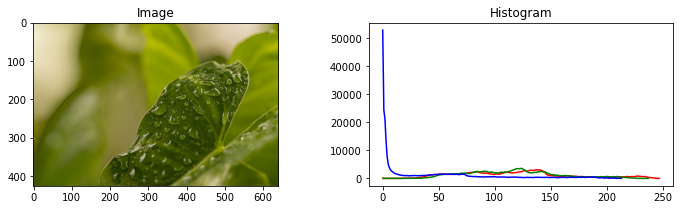

In [32]:
histColor(G)

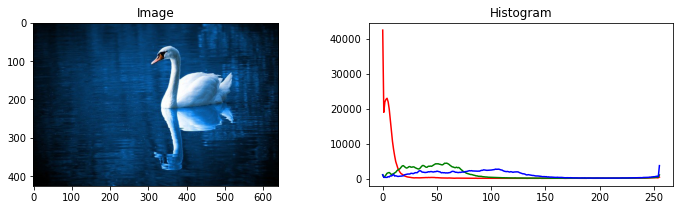

In [33]:
histColor(B)

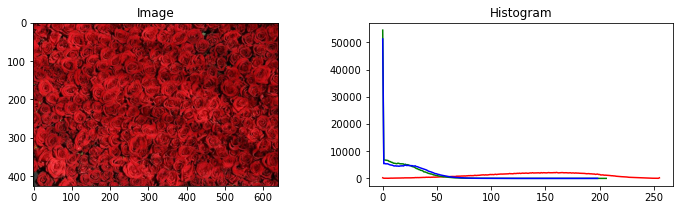

In [34]:
histColor(R)